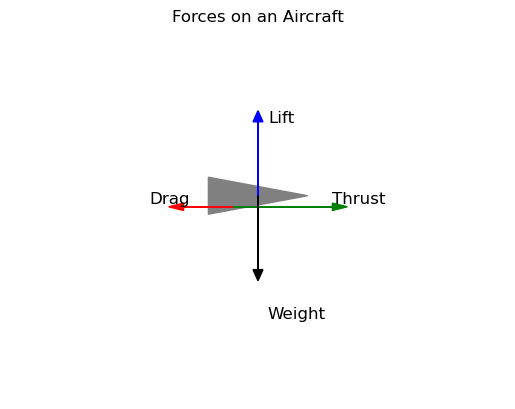

In [2]:
# Jupyter Cell 1: Basic Force Diagram

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Draw plane as a triangle
plane = plt.Polygon([[4, 5], [6, 5.5], [4, 6]], color='gray')
ax.add_patch(plane)

# Draw arrows: Lift, Drag, Thrust, Weight
ax.arrow(5, 5.5, 0, 2, head_width=0.2, color='blue', label='Lift')
ax.text(5.2, 7.5, 'Lift', fontsize=12)

ax.arrow(5.5, 5.2, -2, 0, head_width=0.2, color='red', label='Drag')
ax.text(2.8, 5.3, 'Drag', fontsize=12)

ax.arrow(4.5, 5.2, 2, 0, head_width=0.2, color='green', label='Thrust')
ax.text(6.5, 5.3, 'Thrust', fontsize=12)

ax.arrow(5, 5.5, 0, -2, head_width=0.2, color='black', label='Weight')
ax.text(5.2, 2.2, 'Weight', fontsize=12)

ax.axis('off')
plt.title("Forces on an Aircraft")
plt.show()


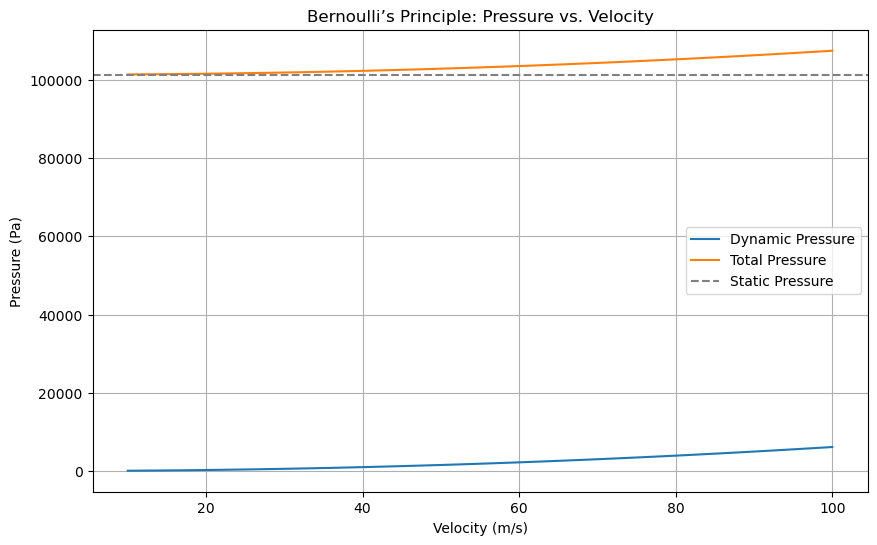

In [3]:
# Jupyter Cell 2: Pressure vs. Velocity Visualization

import numpy as np
import matplotlib.pyplot as plt

v = np.linspace(10, 100, 100)  # velocity in m/s
rho = 1.225  # air density (kg/m^3)
p_static = 101325  # sea level pressure

p_dynamic = 0.5 * rho * v**2
p_total = p_static + p_dynamic

plt.figure(figsize=(10, 6))
plt.plot(v, p_dynamic, label='Dynamic Pressure')
plt.plot(v, p_total, label='Total Pressure')
plt.axhline(y=p_static, color='gray', linestyle='--', label='Static Pressure')

plt.xlabel('Velocity (m/s)')
plt.ylabel('Pressure (Pa)')
plt.title('Bernoulli’s Principle: Pressure vs. Velocity')
plt.legend()
plt.grid(True)
plt.show()


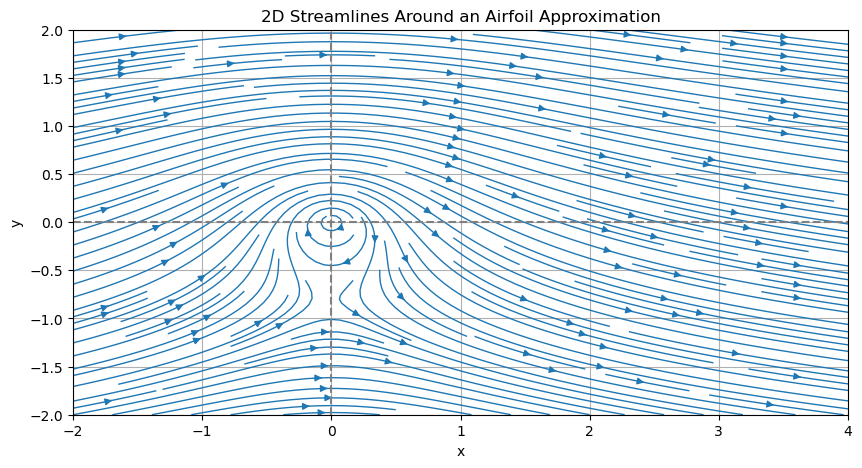

In [4]:
# Jupyter Cell 3: Streamlines around a cambered airfoil

import matplotlib.pyplot as plt
import numpy as np

# Define grid
x, y = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 2, 100))
U = 1  # Uniform flow
V = 0

# Superimpose flow with a vortex and source to simulate lift
r_squared = x**2 + y**2
gamma = 5  # circulation strength

u = U + gamma*y/(2*np.pi*r_squared)
v = V - gamma*x/(2*np.pi*r_squared)

plt.figure(figsize=(10, 5))
plt.streamplot(x, y, u, v, density=2, linewidth=1)
plt.title('2D Streamlines Around an Airfoil Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


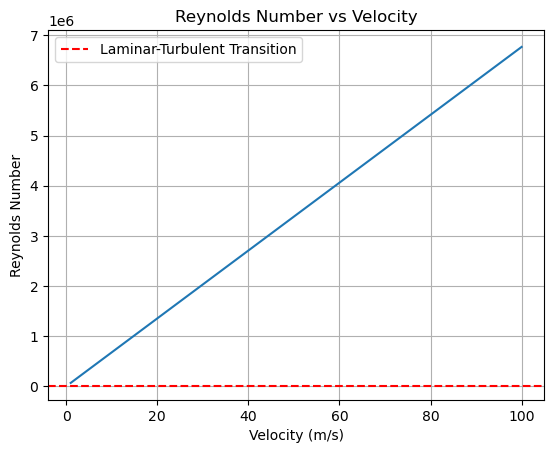

In [5]:
# Jupyter Cell 4: Visualizing Reynolds Number

mu = 1.81e-5  # dynamic viscosity of air (kg/m·s)
rho = 1.225  # air density
L = 1.0  # characteristic length (m)
velocities = np.linspace(1, 100, 200)
Re = (rho * velocities * L) / mu

plt.plot(velocities, Re)
plt.axhline(2300, color='red', linestyle='--', label='Laminar-Turbulent Transition')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Reynolds Number")
plt.title("Reynolds Number vs Velocity")
plt.legend()
plt.grid(True)
plt.show()


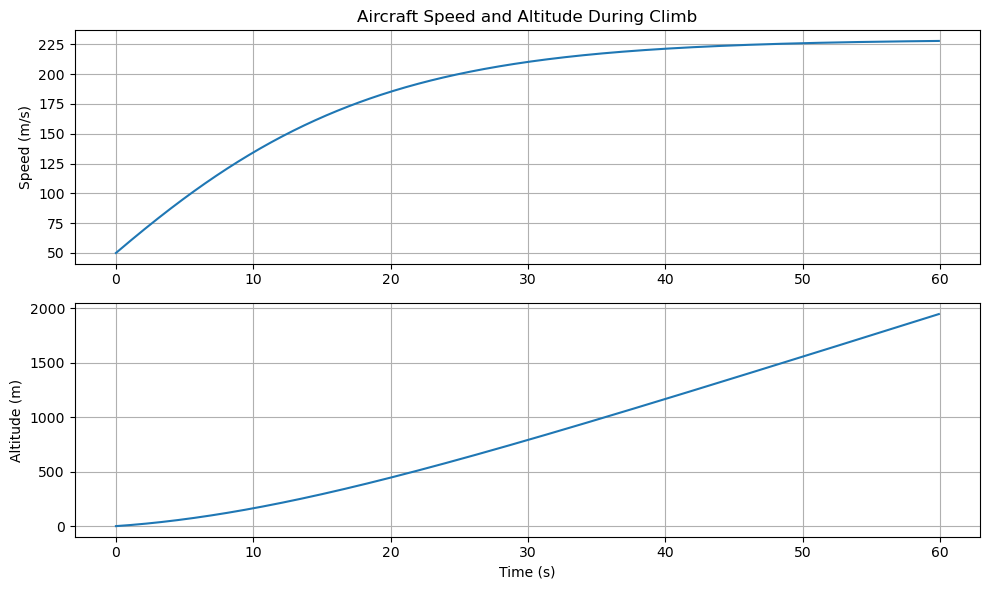

In [6]:
# Jupyter Cell 1: Simulate and visualize a climb using basic flight mechanics

import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s²
mass = 1500  # kg (light aircraft)
T = 18000  # N (thrust)
Cd = 0.03  # drag coefficient
Cl = 0.6   # lift coefficient
rho = 1.225  # kg/m³ (air density at sea level)
S = 16  # m² (wing area)
dt = 0.1  # time step
time = np.arange(0, 60, dt)  # simulate for 1 minute

# Initialize arrays
v = np.zeros_like(time)
alt = np.zeros_like(time)
gamma = np.radians(10)  # 10° climb angle
v[0] = 50  # initial speed in m/s

for i in range(1, len(time)):
    D = 0.5 * rho * v[i-1]**2 * S * Cd
    L = 0.5 * rho * v[i-1]**2 * S * Cl
    W = mass * g

    # Net force along the flight path
    F_net = T - D - W * np.sin(gamma)
    a = F_net / mass
    v[i] = v[i-1] + a * dt
    alt[i] = alt[i-1] + v[i-1] * np.sin(gamma) * dt

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, v)
plt.ylabel('Speed (m/s)')
plt.title('Aircraft Speed and Altitude During Climb')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, alt)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


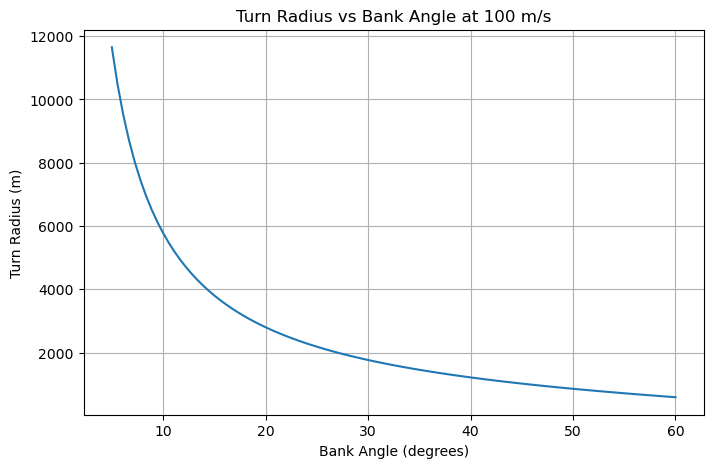

In [7]:
# Jupyter Cell 2: Bank angle vs. turn radius

bank_angles = np.radians(np.linspace(5, 60, 100))  # in radians
v = 100  # m/s constant speed

turn_radius = v**2 / (g * np.tan(bank_angles))

plt.figure(figsize=(8, 5))
plt.plot(np.degrees(bank_angles), turn_radius)
plt.xlabel('Bank Angle (degrees)')
plt.ylabel('Turn Radius (m)')
plt.title('Turn Radius vs Bank Angle at 100 m/s')
plt.grid(True)
plt.show()


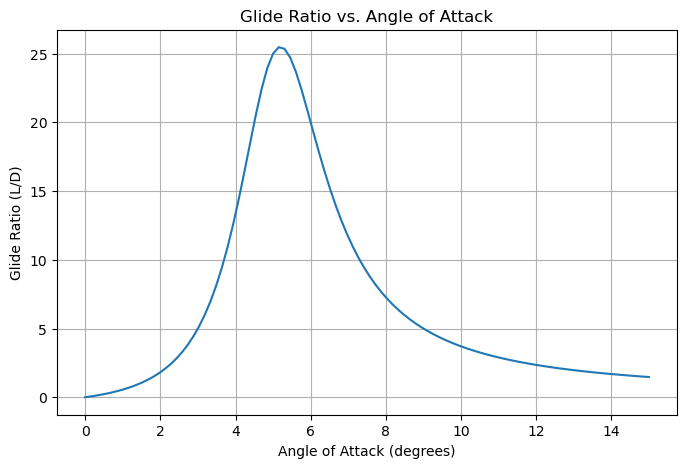

In [8]:
# Jupyter Cell 3: Glide ratio vs. angle of attack (α)

alpha_deg = np.linspace(0, 15, 100)
alpha_rad = np.radians(alpha_deg)

# Simplified Lift and Drag models
Cl = 0.1 * alpha_deg
Cd = 0.02 + 0.01 * (alpha_deg - 5)**2  # parabolic drag

glide_ratio = Cl / Cd

plt.figure(figsize=(8, 5))
plt.plot(alpha_deg, glide_ratio)
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Glide Ratio (L/D)")
plt.title("Glide Ratio vs. Angle of Attack")
plt.grid(True)
plt.show()


# Propulsion

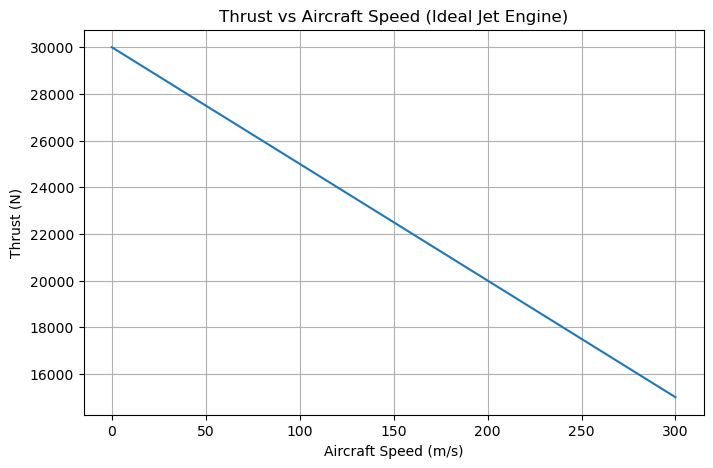

In [9]:
# Jupyter Cell 1: Simulate thrust change with speed and altitude

import numpy as np
import matplotlib.pyplot as plt

# Constants
v0 = np.linspace(0, 300, 100)  # aircraft speed [m/s]
ve = 600  # exhaust velocity [m/s]
mdot = 50  # mass flow rate [kg/s]

# Thrust from ideal jet engine
thrust = mdot * (ve - v0)

plt.figure(figsize=(8, 5))
plt.plot(v0, thrust)
plt.xlabel('Aircraft Speed (m/s)')
plt.ylabel('Thrust (N)')
plt.title('Thrust vs Aircraft Speed (Ideal Jet Engine)')
plt.grid(True)
plt.show()


In [10]:
# Jupyter Cell 2: Specific Impulse Calculation

g0 = 9.81  # m/s^2
thrust = 20000  # N
mdot = 50  # kg/s

Isp = thrust / (mdot * g0)
print(f"Specific Impulse (Isp): {Isp:.2f} seconds")


Specific Impulse (Isp): 40.77 seconds


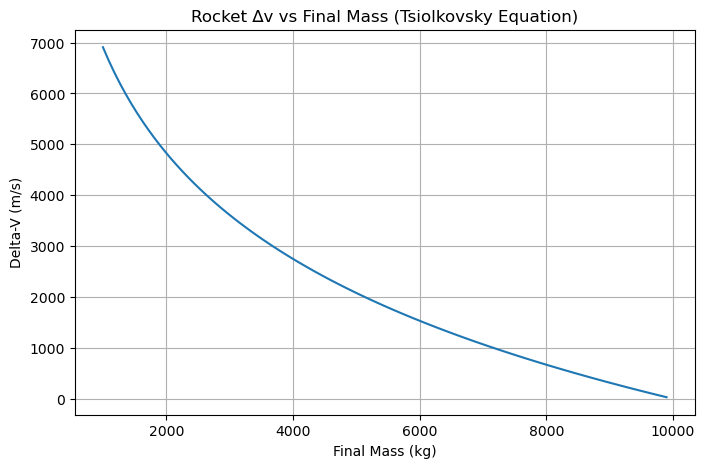

In [11]:
# Jupyter Cell 3: Tsiolkovsky Rocket Equation Visualization

ve = 3000  # exhaust velocity (m/s)
m0 = 10000  # initial mass
mf = np.linspace(1000, 9900, 100)

delta_v = ve * np.log(m0 / mf)

plt.figure(figsize=(8, 5))
plt.plot(mf, delta_v)
plt.xlabel("Final Mass (kg)")
plt.ylabel("Delta-V (m/s)")
plt.title("Rocket ∆v vs Final Mass (Tsiolkovsky Equation)")
plt.grid(True)
plt.show()


# Thermodynamics in Engines #

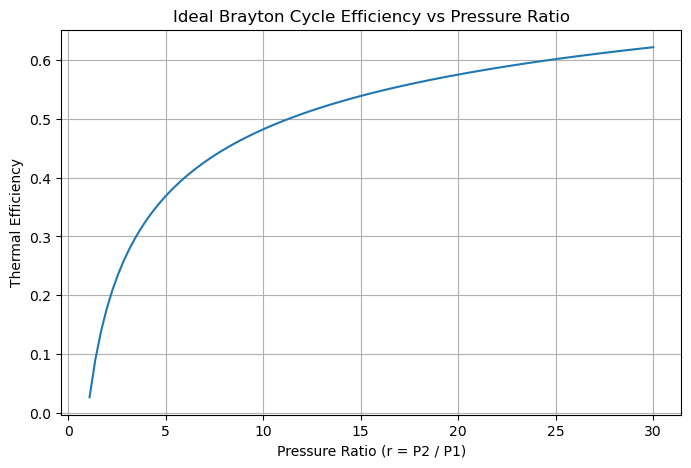

In [12]:
# Jupyter Cell 1: Brayton Cycle Efficiency vs Pressure Ratio

import numpy as np
import matplotlib.pyplot as plt

gamma = 1.4
r = np.linspace(1.1, 30, 100)
eta = 1 - (1 / r)**((gamma - 1) / gamma)

plt.figure(figsize=(8, 5))
plt.plot(r, eta)
plt.xlabel('Pressure Ratio (r = P2 / P1)')
plt.ylabel('Thermal Efficiency')
plt.title('Ideal Brayton Cycle Efficiency vs Pressure Ratio')
plt.grid(True)
plt.show()


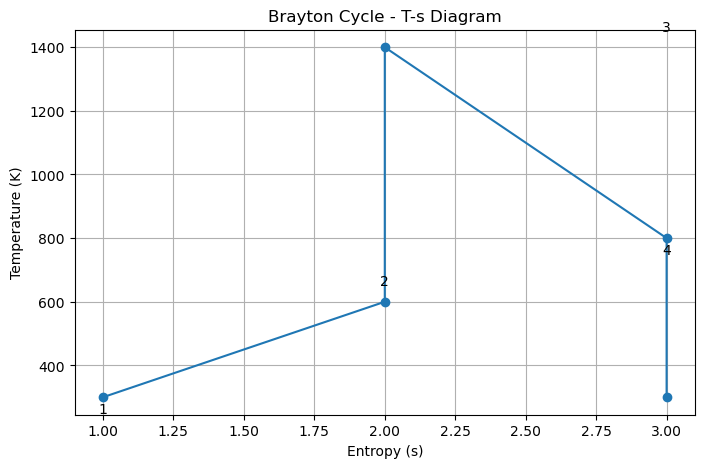

In [13]:
# Jupyter Cell 2: T-s diagram (qualitative)

T1, T2, T3, T4 = 300, 600, 1400, 800  # K
s = [1, 2, 3, 4]

T = [T1, T2, T3, T4, T1]
S = [s[0], s[1], s[1], s[2], s[2]]

plt.figure(figsize=(8, 5))
plt.plot(S, T, marker='o')
plt.xlabel("Entropy (s)")
plt.ylabel("Temperature (K)")
plt.title("Brayton Cycle - T-s Diagram")
plt.text(s[0], T1 - 50, "1", ha='center')
plt.text(s[1], T2 + 50, "2", ha='center')
plt.text(s[2], T3 + 50, "3", ha='center')
plt.text(s[2], T4 - 50, "4", ha='center')
plt.grid(True)
plt.show()


In [ ]:
# Jupyter Cell 3: Rocket exhaust velocity vs pressure ratio

gamma = 1.3
R = 287  # J/kg·K
T0 = 3500  # K
P0 = 1e6  # Pa

Pe = np.linspace(1e3, P0, 1000)
ve = np.sqrt( (2*gamma/(gamma-1)) * R * T0 * (1 - (Pe/P0)**((gamma-1)/gamma)) )

plt.figure(figsize=(8, 5))
plt.plot(Pe/P0, ve)
plt.xlabel("Exit Pressure Ratio (Pe / P0)")
plt.ylabel("Exhaust Velocity (m/s)")
plt.title("Exhaust Velocity vs Pressure Ratio in Rocket Nozzle")
plt.grid(True)
plt.show()
